<a href="https://colab.research.google.com/github/ali-talebi/norouz1404/blob/main/RNN_FOR_DATA_PICTURE_edit_for_3d_specific_edit_2025_09_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip

Archive:  /content/drive/MyDrive/Malek_Master/code/DATA_PICTURE_3D_Change.zip
   creating: DATA_PICTURE_3D_Change/
   creating: DATA_PICTURE_3D_Change/picture_alpha/
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.001_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.3.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.002_void_0.4.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.1.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_void_0.2.csv  
  inflating: DATA_PICTURE_3D_Change/picture_alpha/alpha_0.003_vo

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.8 MB/s eta 0:00:00


In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import Dense , Dropout , Conv2D , BatchNormalization , Flatten , Conv2DTranspose , Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
import visualkeras
from sklearn.model_selection import train_test_split

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path_data = "/content/DATA_PICTURE_3D_Change"

store_data_set = {
					'picture_alpha':[] ,
					'picture_health' : [] ,
					'picture_void' : [] ,
					'picture_void_alpha' : []
				}

def function_conver_and_load_image() :
  for path in os.listdir(path_data) :
    print(path)
    cursur = None
    if path == 'picture_alpha' :
      cursur = 'picture_alpha'
    elif path == 'picture_health' :
      cursur = 'picture_health'
    elif path == 'picture_void' :
      cursur = 'picture_void'
    elif path == 'picture_void_alpha' :
      cursur = 'picture_void_alpha'

    for file in os.listdir(f'{path_data}/{path}') :
      combined_root = f'{path_data}/{path}/{file}'
      print(combined_root)
      df = pd.read_csv(combined_root)
      matrix_picture_z = []
      matrix_picture_y = []
      matrix_picture_x = []
      for index in range(len(df)) :
        value_z = df.iloc[index , 2 ]
        matrix_picture_z.append(value_z)
        value_y = df.iloc[index , 1 ]
        matrix_picture_y.append(value_y)
        value_x = df.iloc[index , 0 ]
        matrix_picture_x.append(value_x)

      matrix_picture_z = np.array(matrix_picture_z).reshape(16,3)
      matrix_picture_y = np.array(matrix_picture_y).reshape(16,3)
      matrix_picture_x = np.array(matrix_picture_x).reshape(16,3)

      matrix_picture = {'x':matrix_picture_x , 'y':matrix_picture_y , 'z':matrix_picture_z }
      store_data_set[cursur].append(matrix_picture)


  return store_data_set
store_data_set = function_conver_and_load_image()



picture_alpha
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.025_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.013_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.087_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.078_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.06_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.094_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.055_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.009_void_0.4.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.012_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.034_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.008_void_0.2.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.034_void_0.1.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.027_void_0.3.csv
/content/DATA_PICTURE_3D_Change/picture_alpha/alpha_0.02_void_0.

In [6]:
total_health_x_y_z , label_health = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_health' :
      total_health_x_y_z.append(img)
      label_health.append(i)


In [7]:
x_health , y_health , z_health = [] , [] , []

# fig = plt.figure(figsize=(10 , 5 ))
# ax0 = fig.add_subplot(1 , 3 , 1 , projection='3d' )
# ax1 = fig.add_subplot(1 , 3 , 2 )
# ax2 = fig.add_subplot(1 , 3 , 3  )

for i in total_health_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax1.scatter3D(i['x'] , i['y'] , [ [0,0,0] for i in i['z']]   , label='Health Point' , c = 'red'   )
  # ax1.scatter(i['x'] , i['z']  , c = 'r' , label = 'HP-2D, (x,y)'   )
  # ax2.scatter(i['y'] , i['z']  , c = 'g' , label = 'HP-2D, (y,z)'   )
  # ax0.legend()
  # ax0.grid()
  # ax1.legend()
  # ax1.grid()
  # ax2.legend()
  # ax2.grid()

  # plt.show()


  x_health.append(i['x'])
  y_health.append(i['y'])
  z_health.append(i['z'])

In [10]:
print("Matrix Z for a Sample in Class Health")
for k in i['z'] :
  print(k)

Matrix Z for a Sample in Class Health
[0.01793158 0.01415944 0.01609541]
[-0.00083343 -0.00472601  0.02017229]
[0.07944433 0.07182565 0.09435011]
[0.13050734 0.11426129 0.1388215 ]
[0.20507132 0.17625778 0.21950074]
[0.31557295 0.3109788  0.42337515]
[0.52589868 0.54048521 0.56052643]
[0.59753025 0.69489932 0.56716367]
[0.83728358 0.95095295 1.07690336]
[1.42513166 1.3125709  1.38427998]
[1.79534427 1.60577375 1.73293547]
[2.16318433 2.130255   2.28966248]
[2.78071584 2.85325698 2.79723679]
[3.40340417 3.45634407 3.03770874]
[4.35866951 4.10928686 4.03420104]
[4.82923865 5.17614493 4.88269304]


In [ ]:
i['x'].shape

(16, 3)

In [ ]:
i['y'].shape

(16, 3)

In [ ]:
i['z'].shape

(16, 3)

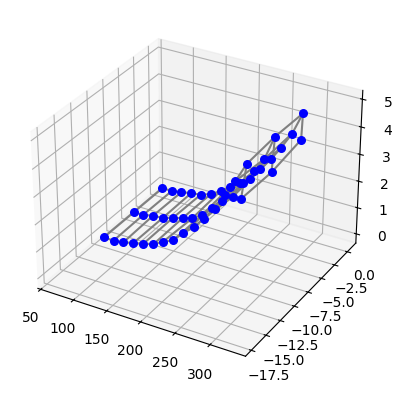

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# داده‌های خودت
X = np.array(i['x'])   # ابعاد: 16x3
Y = np.array(i['y'])
Z = np.array(i['z'])

# ساخت گراف
G = nx.Graph()

# افزودن نودها
for r in range(X.shape[0]):      # 16
    for c in range(X.shape[1]):  # 3
        node_id = (r, c)
        G.add_node(node_id, pos=(X[r, c], Y[r, c], Z[r, c]))

# افزودن یال‌ها
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        if r < X.shape[0] - 1:   # اتصال به ردیف بعدی
            G.add_edge((r, c), (r+1, c))
        if c < X.shape[1] - 1:   # اتصال به ستون بعدی
            G.add_edge((r, c), (r, c+1))

# رسم
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pos = nx.get_node_attributes(G, 'pos')

# رسم نودها
for node, (x, y, z) in pos.items():
    ax.scatter(x, y, z, c='b', s=30)

# رسم یال‌ها
for (n1, n2) in G.edges:
    xline = [pos[n1][0], pos[n2][0]]
    yline = [pos[n1][1], pos[n2][1]]
    zline = [pos[n1][2], pos[n2][2]]
    ax.plot(xline, yline, zline, c='gray')

plt.show()


In [ ]:
x_health = np.array(x_health).reshape(-1 , 16 , 3 , 1 )
y_health = np.array(y_health).reshape(-1 , 16 , 3 , 1 )
z_health = np.array(z_health).reshape(-1 , 16 , 3 , 1 )

In [ ]:
x_health.shape

(396, 16, 3, 1)

In [ ]:
x_true.shape

NameError: name 'x_true' is not defined

In [11]:
TOTAL_X_health_vector = []
TOTAL_Target_X_health_vector = []

for picture in z_health :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_health_vector.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Target_X_health_vector.append(picture[i + window_size])

TOTAL_X_health_vector_array = np.array(TOTAL_X_health_vector).reshape(-1 , 2 , 3 )
TOTAL_Target_X_health_vector_array = np.array(TOTAL_Target_X_health_vector).reshape(-1 , 3 )


In [12]:
TOTAL_X_health_vector_array.shape

(5544, 2, 3)

In [13]:
TOTAL_Target_X_health_vector_array.shape

(5544, 3)

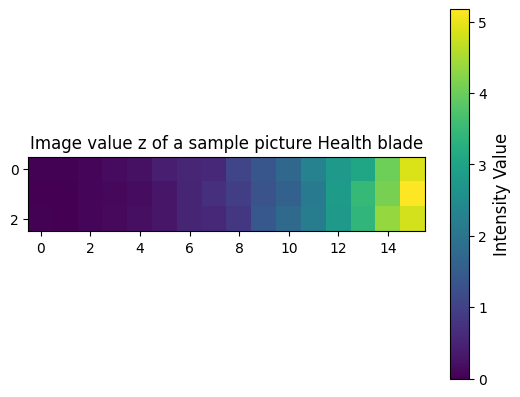

NameError: name 'x' is not defined

In [14]:
import matplotlib.colors
rotated_data = np.rot90(picture_reshaped)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()
print(x[0][ : , : , 0 ])

In [15]:
TOTAL_X_health_vector_array.shape

(5544, 2, 3)

In [16]:
TOTAL_X_health_vector_array[3]

array([[0.12894357, 0.11210173, 0.11204643],
       [0.1924037 , 0.14415211, 0.17510583]])

In [17]:
TOTAL_Target_X_health_vector_array[3]

array([0.333961  , 0.30626053, 0.26005472])

In [34]:
TOTAL_Target_X_health_vector_array.shape

(5544, 3)

In [35]:
TOTAL_X_health_vector_array.shape

(5544, 2, 3)

In [36]:
x_train , x_test , y_train , y_test = train_test_split(TOTAL_X_health_vector_array,TOTAL_Target_X_health_vector_array , test_size=0.3 , random_state = 42 )

In [37]:
x_train.shape

(3880, 2, 3)

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ————— تعریف مدل —————
model = Sequential([
    # لایه LSTM: 4 واحد پنهان، فقط خروجی نهایی را باز می‌گرداند
    LSTM(64, input_shape=(2, 3), return_sequences=False),
    # برای کاهش بیش‌برازش، کمی Dropout
    Dropout(0.2),
    # یک لایه میانی برای افزایش ظرفیت غیرخطی مدل
    Dense(16, activation='relu'),
    # لایه خروجی با 3 نورون (برای هر feature یک مقدار)
    Dense(3)
])

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mse']
)
model.summary()

# ————— تنظیم EarlyStopping —————
es = EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

# ————— آموزش مدل —————
history = model.fit(
    x_train, y_train,
    epochs=300,
    batch_size=64,
    validation_split=0.2,
    # callbacks=[es],
    verbose=2
)

# ————— پیش‌بینی —————
# مثال: پیش‌بینی برای آخرین دو سطر
x_new = x_train[-1][np.newaxis, ...]      # شکل (1,2,3)
y_pred = model.predict(x_new)       # شکل (1,3)
print("پیش‌بینی:", y_pred[0])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,499 (72.26 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
49/49 - 3s - 60ms/step - loss: 3.0809 - mse: 3.0809 - val_loss: 0.5694 - val_mse: 0.5694
Epoch 2/300
49/49 - 0s - 6ms/step - loss: 0.1939 - mse: 0.1939 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 3/300
49/49 - 0s - 6ms/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0241 - val_mse: 0.0241
Epoch 4/300
49/49 - 0s - 6ms/step - loss: 0.0624 - mse: 0.0624 - val_loss: 0.0212 - val_mse: 0.0212
Epoch 5/300
49/49 - 0s - 6ms/step - loss: 0.0596 - mse: 0.0596 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 6/300
49/49 - 0s - 6ms/step - loss: 0.0567 - mse: 0.0567 - val_loss: 0.0221 - val_mse: 0.0221
Epoch 7/300
49/49 - 0s - 6ms/step - loss: 0.0524 - mse: 0.0524 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 8/300
49/49 - 0s - 6ms/step - loss: 0.0472 - mse: 0.0472 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 9/300
49/49 - 0s - 6ms/step - loss: 0.0463 - mse: 0.0463 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 10/300
49/49 - 0s - 6ms/step - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0132 - val_mse: 0.013

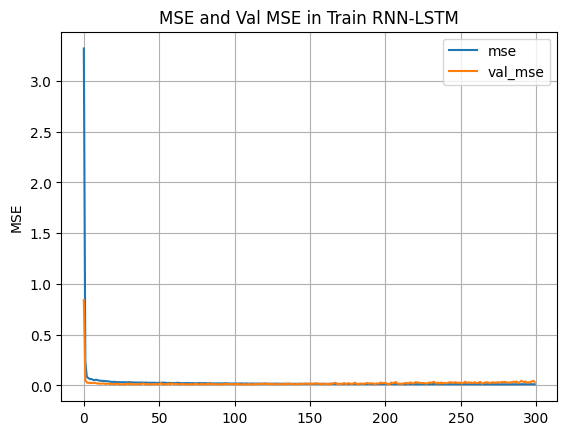

In [38]:
plt.plot(range(300) , history.history['mse'] , label = 'mse' )
plt.plot(range(300) , history.history['val_mse'] , label = 'val_mse' )
plt.title("MSE and Val MSE in Train RNN-LSTM")
plt.legend()
plt.ylabel("MSE")
plt.grid()
plt.show()

In [39]:
print(model.summary())
print("RNN Model Input Shape: ", model.inputs)
print("RNN Model Output Shape: ",model.outputs)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,499 (216.80 KB)

 Trainable params: 18,499 (72.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,000 (144.54 KB)

None
RNN Model Input Shape:  [<KerasTensor shape=(None, 2, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_5>]
RNN Model Output Shape:  [<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_9>]


In [40]:
model.outputs

[<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=keras_tensor_9>]

In [41]:
model.output_shape

(None, 3)

/usr/local/lib/python3.12/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


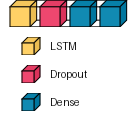

In [42]:
visualkeras.layered_view(model, legend=True )

In [43]:
x_train.shape

(3880, 2, 3)

In [44]:
y_pre_for_total_x_train = model.predict(x_train)

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
y_test.shape

(1664, 3)

In [46]:
y_pre_for_total_x_train.shape

(3880, 3)

In [ ]:
for index in range(len(y_train)):
  print(y_train[index])
  print(y_pre_for_total_x_train[index])
  print(" ******** ------- ******* ")
  if index > 1 :
    break

[0.86412053 1.02636509 0.95137788]
[1.0115752 1.0103071 1.0175188]
 ******** ------- ******* 
[1.80375872 1.70709436 1.7811277 ]
[1.7403328 1.7375569 1.7391374]
 ******** ------- ******* 
[3.3514187  3.36859743 3.3386192 ]
[3.4163928 3.4167552 3.3912969]
 ******** ------- ******* 


In [47]:
y_predict = model.predict(x_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [48]:
y_predict.shape

(1664, 3)

In [49]:
y_test.shape

(1664, 3)

In [50]:
t = []
t.append(x_test[0])
t = np.array(t)
y_t = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [51]:
t.shape

(1, 2, 3)

In [52]:
t

array([[[1.0466274 , 0.89014239, 1.05809265],
        [1.46533694, 1.54826679, 1.40890718]]])

In [53]:
y_test[0]

array([1.77535171, 1.73598031, 1.86580232])

In [54]:
y_t

array([[1.7963032, 1.7717211, 1.7712424]], dtype=float32)

In [ ]:
z_health.shape

(396, 16, 3, 1)

In [111]:
r = 0
total_vector_error_health = []
TOTAL_MSE_x_HEALTH_TRAIN  = []
for picture in z_health[::4] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  # total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Point heights to be reconstructed for class Health')

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('Original Point heights (visual view) for class Health ')

  # plt.show()
  #------------------------------------------------------###

  SE = 0

  local_error = []
  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    local_error.append(diff)
    for index_2 in range(len(diff)):
      SE += diff[index_2]

  total_vector_error_health.append(local_error)

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_x_HEALTH_TRAIN.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped
  # break







1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━

In [81]:
plt.imshow(new_sample_y_array)
plt.show()

NameError: name 'new_sample_y_array' is not defined

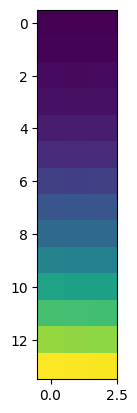

In [75]:
plt.imshow(total_y_pre)
plt.show()

In [24]:
total_vector_error_health

[[array([0.13920222, 0.153719  , 0.15590463]),
  array([0.13373899, 0.14777235, 0.15185698]),
  array([0.14732119, 0.19270614, 0.16568486]),
  array([0.07854392, 0.10325235, 0.15346759]),
  array([0.0724501 , 0.01901825, 0.07529028]),
  array([0.14914513, 0.05241871, 0.06026824]),
  array([0.03497593, 0.01947895, 0.02626052]),
  array([ 0.10311734, -0.07996703,  0.05782055]),
  array([-0.08036693, -0.09886481, -0.15476638]),
  array([-0.09977929, -0.30125301, -0.18453274]),
  array([-0.11344136, -0.00491756, -0.11224811]),
  array([-0.12582191,  0.08540076, -0.20039894]),
  array([-0.04645664, -0.1845584 , -0.34486966]),
  array([ 0.01147184, -0.22620562, -0.20741096])],
 [array([0.14588264, 0.13378468, 0.1488568 ]),
  array([0.16598946, 0.13371449, 0.16812558]),
  array([0.13391042, 0.17555184, 0.18555086]),
  array([0.09602004, 0.03825946, 0.13496581]),
  array([0.1264193 , 0.08847219, 0.15694981]),
  array([0.08783914, 0.06333337, 0.05084871]),
  array([ 0.02240204,  0.10978455, -0.

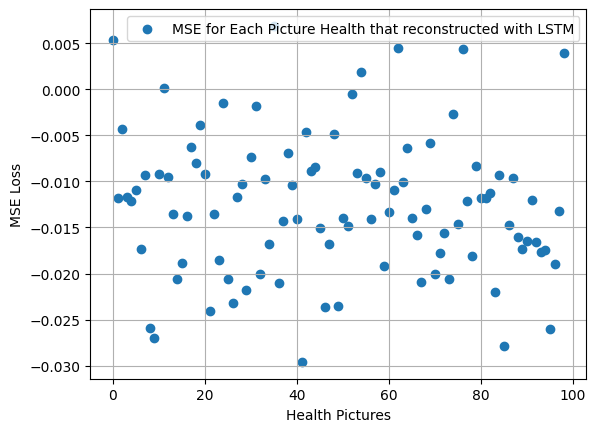

In [112]:
plt.scatter(range(len(TOTAL_MSE_x_HEALTH_TRAIN)) , TOTAL_MSE_x_HEALTH_TRAIN , label="MSE for Each Picture Health that reconstructed with LSTM")
plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Health Pictures")
plt.grid()
plt.show()

In [113]:
total_alpha_x_y_z , label_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_alpha' :
      total_alpha_x_y_z.append(img)
      label_alpha.append(i)


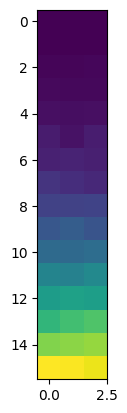

In [61]:
plt.imshow(total_alpha_x_y_z[0]['z'])
plt.show()

In [114]:
x_alpha , y_alpha , z_alpha = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_alpha_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_alpha.append(i['x'])
  y_alpha.append(i['y'])
  z_alpha.append(i['z'])


x_alpha = np.array(x_alpha).reshape(-1 , 16 , 3 , 1 )
y_alpha = np.array(y_alpha).reshape(-1 , 16 , 3 , 1 )
z_alpha = np.array(z_alpha).reshape(-1 , 16 , 3 , 1 )

In [115]:
TOTAL_X_vector_alpha = []
TOTAL_Y_vector_alpha = []

for picture in z_alpha :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_alpha.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_alpha.append(picture[i + window_size])

TOTAL_X_vector_alpha_array = np.array(TOTAL_X_vector_alpha).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_alpha_array = np.array(TOTAL_Y_vector_alpha).reshape(-1 , 3 )

r = 0
TOTAL_MSE_alpha   = []
for picture in z_alpha[::4] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Image predicted Health by LSTM recurrent network')
  # ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('The original image Health given to the LSTM recurrent network')
  # ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  # plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += abs(diff[index_2] )

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_alpha.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

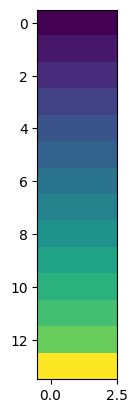

In [70]:
plt.imshow(new_sample_y_array)
plt.show()

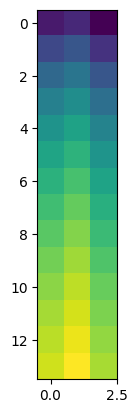

In [71]:
plt.imshow(total_y_pre)
plt.show()

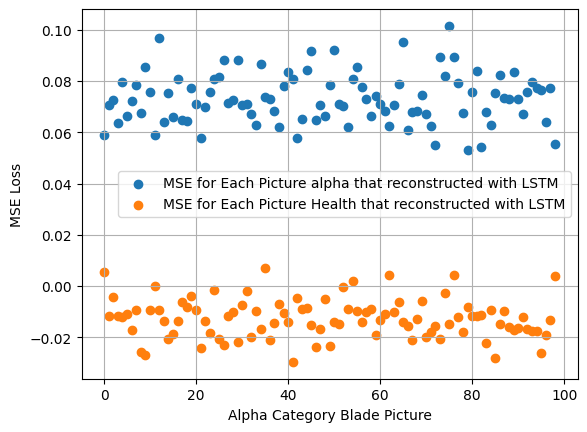

In [116]:
plt.scatter(range(len(TOTAL_MSE_alpha)) , TOTAL_MSE_alpha , label="MSE for Each Picture alpha that reconstructed with LSTM")
plt.scatter(range(len(TOTAL_MSE_x_HEALTH_TRAIN)) , TOTAL_MSE_x_HEALTH_TRAIN , label="MSE for Each Picture Health that reconstructed with LSTM")

plt.legend()
plt.ylabel("MSE Loss")
plt.xlabel("Alpha Category Blade Picture")
plt.grid()
plt.show()

In [117]:
total_void_x_y_z , label_void = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void' :
      total_void_x_y_z.append(img)
      label_void.append(i)

x_void , y_void , z_void = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_void_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_void.append(i['x'])
  y_void.append(i['y'])
  z_void.append(i['z'])

x_void = np.array(x_void).reshape(-1 , 16 , 3 , 1 )
y_void = np.array(y_void).reshape(-1 , 16 , 3 , 1 )
z_void = np.array(z_void).reshape(-1 , 16 , 3 , 1 )


TOTAL_X_vector_void = []
TOTAL_Y_vector_void = []

for picture in z_void :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_void.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_void.append(picture[i + window_size])

TOTAL_X_vector_void_array = np.array(TOTAL_X_vector_void).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_void_array = np.array(TOTAL_Y_vector_void).reshape(-1 , 3 )

r = 0
TOTAL_MSE_void   = []
for picture in z_void[::4] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Image predicted Health by LSTM recurrent network')
  # ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('The original image Health given to the LSTM recurrent network')
  # ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  # plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += abs(diff[index_2])

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_void.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━

In [120]:
total_void_alpha_x_y_z , label_void_alpha = [] , []
for i in store_data_set :
  for img in store_data_set[i] :
    if i == 'picture_void_alpha' :
      total_void_alpha_x_y_z.append(img)
      label_void_alpha.append(i)

x_void_alpha , y_void_alpha , z_void_alpha = [] , [] , []

# fig = plt.figure(figsize=(25 , 13 ))
# ax0 = fig.add_subplot(1 , 6 , 1 , projection='3d' )

for i in total_void_x_y_z:
  # ax0.scatter3D(i['x'] , i['y'] , i['z']  , label='Health Point' , c = 'b'   )
  # ax0.legend()
  # ax0.grid()
  # plt.show()

  x_void_alpha.append(i['x'])
  y_void_alpha.append(i['y'])
  z_void_alpha.append(i['z'])

x_void_alpha = np.array(x_void_alpha).reshape(-1 , 16 , 3 , 1 )
y_void_alpha = np.array(y_void_alpha).reshape(-1 , 16 , 3 , 1 )
z_void_alpha = np.array(z_void_alpha).reshape(-1 , 16 , 3 , 1 )


TOTAL_X_vector_void_alpha = []
TOTAL_Y_vector_void_alpha = []

for picture in z_void_alpha :
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    TOTAL_X_vector_void.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    TOTAL_Y_vector_void.append(picture[i + window_size])

TOTAL_X_vector_void_array = np.array(TOTAL_X_vector_void).reshape(-1 , 2 , 3 )
TOTAL_Y_vector_void_array = np.array(TOTAL_Y_vector_void).reshape(-1 , 3 )

r = 0
TOTAL_MSE_void_alpha   = []
for picture in z_void_alpha[::4] :
  new_sample_x = []
  new_sample_y = []
  picture_reshaped = picture.reshape(16 , 3)
  window_size = 2
  n_samples   = picture_reshaped.shape[0] - window_size
  for i in range(n_samples):
    # دو سطر i و i+1 ورودی
    new_sample_x.append(picture[i : i + window_size])    # شکل (2,3)
    # سطر i+2 خروجی
    new_sample_y.append(picture[i + window_size])

  new_sample_x_array = np.array(new_sample_x).reshape(-1 , 2 , 3 )
  new_sample_y_array = np.array(new_sample_y).reshape(-1 , 3 )
  total_y_pre = []
  for i in new_sample_x_array :
    t=[]
    t.append(i)
    t = np.array(t)
    y_pre = model.predict(t)
    y_pre = y_pre.tolist()
    total_y_pre.append(y_pre[0])


  total_y_pre = np.array(total_y_pre)
  # fig = plt.figure(figsize = (15 , 5 ) )
  # ax1 = fig.add_subplot(1 , 2 , 1 )
  # ax2 = fig.add_subplot(1 , 2 , 2 )
  # rotated_data = np.rot90(total_y_pre)
  # img = ax1.imshow(rotated_data ,  cmap='viridis')
  # cbar = plt.colorbar(img,)
  # ax1.set_title('Image predicted Health by LSTM recurrent network')
  # ax1.set_xlabel("From every 2 consecutive columns of the original image,\n the next consecutive column is predicted by the LSTM network.")

  # rotated_data = np.rot90(new_sample_y_array)
  # img = ax2.imshow(rotated_data ,  cmap='viridis'  )
  # cbar = plt.colorbar(img,)
  # cbar.set_label('Intensity Value', fontsize=12)
  # ax2.set_title('The original image Health given to the LSTM recurrent network')
  # ax2.set_xlabel("Using any two consecutive columns given to the network,\n the next column is predicted.")
  # plt.show()
  ##------------------------------------------------------###

  SE = 0

  for index in range(len(total_y_pre)):
    diff = total_y_pre[index] - new_sample_y_array[index]
    for index_2 in range(len(diff)):
      SE += abs(diff[index_2])

  MSE = SE /  (14*3)
  MSE = MSE.tolist()
  TOTAL_MSE_void_alpha.append(MSE)

  r += 1

  del new_sample_x
  del new_sample_y
  del new_sample_x_array
  del new_sample_y_array
  del total_y_pre
  del picture_reshaped

  if r == 200 :
    break



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

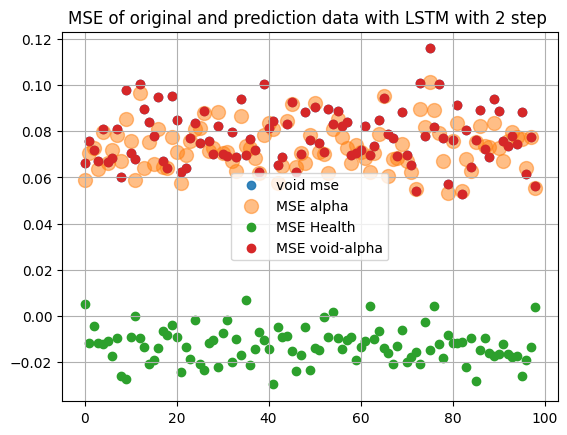

In [121]:
plt.scatter(range(len(TOTAL_MSE_void)) , TOTAL_MSE_void , label="void mse" , alpha = 0.9 )
plt.scatter(range(len(TOTAL_MSE_alpha)) , TOTAL_MSE_alpha , label="MSE alpha" , alpha = 0.5 , s = 100  )
plt.scatter(range(len(TOTAL_MSE_x_HEALTH_TRAIN)) , TOTAL_MSE_x_HEALTH_TRAIN , label="MSE Health")
plt.scatter(range(len(TOTAL_MSE_void_alpha)) , TOTAL_MSE_void_alpha , label="MSE void-alpha")


plt.grid()
plt.title("MSE of original and prediction data with LSTM with 2 step ")
plt.legend()
plt.show()

In [ ]:
new_sample_y_array.shape

(14, 3)

In [ ]:
new_sample_x_array.shape

(14, 2, 3)

In [ ]:
total_y_pre = []
for i in new_sample_x_array :
  t=[]
  t.append(i)
  t = np.array(t)
  y_pre = model.predict(t)
  y_pre = y_pre.tolist()
  total_y_pre.append(y_pre[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
total_y_pre = np.array(total_y_pre)

In [ ]:
total_y_pre.shape

(14, 3)

In [ ]:
total_y_pre

array([[0.08820276, 0.08411194, 0.09013408],
       [0.15143397, 0.14620629, 0.15127295],
       [0.22261724, 0.21776029, 0.2224533 ],
       [0.29768646, 0.29201984, 0.29656166],
       [0.47083747, 0.46391752, 0.46596825],
       [0.75800079, 0.7467711 , 0.74421543],
       [1.01011038, 0.99716938, 0.99219102],
       [1.35388827, 1.33632982, 1.3303386 ],
       [1.70006573, 1.68342733, 1.68268132],
       [2.21103334, 2.18914843, 2.19240522],
       [2.81102276, 2.78247046, 2.78905106],
       [3.43568087, 3.39456749, 3.40399551],
       [4.05242348, 4.00021553, 4.0059886 ],
       [4.90769577, 4.83225203, 4.840837  ]])

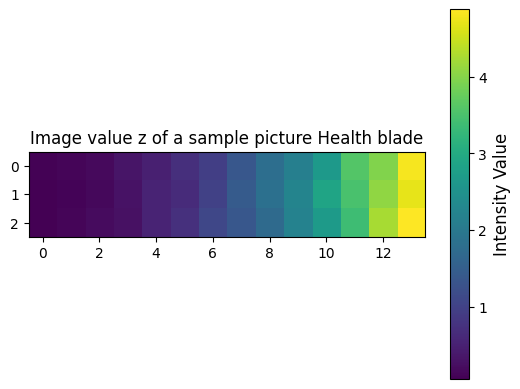

In [ ]:
rotated_data = np.rot90(new_sample_y_array)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()

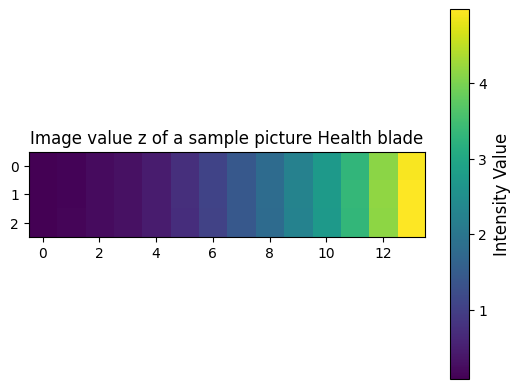

In [ ]:
rotated_data = np.rot90(total_y_pre)
img = plt.imshow(rotated_data ,  cmap='viridis'  )
cbar = plt.colorbar(img,)
cbar.set_label('Intensity Value', fontsize=12)
plt.title('Image value z of a sample picture Health blade')
plt.show()
